# 作業(指定):鳶尾花預測

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 載入鳶尾花數據庫

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_dataset = load_iris()
iris = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
print(iris_dataset.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [5]:
x=iris_dataset.data
y=iris_dataset.target

In [6]:
x

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

# 選擇第二三項做預測

In [7]:
X=x[:,1:3]
X

array([[ 3.5,  1.4],
       [ 3. ,  1.4],
       [ 3.2,  1.3],
       [ 3.1,  1.5],
       [ 3.6,  1.4],
       [ 3.9,  1.7],
       [ 3.4,  1.4],
       [ 3.4,  1.5],
       [ 2.9,  1.4],
       [ 3.1,  1.5],
       [ 3.7,  1.5],
       [ 3.4,  1.6],
       [ 3. ,  1.4],
       [ 3. ,  1.1],
       [ 4. ,  1.2],
       [ 4.4,  1.5],
       [ 3.9,  1.3],
       [ 3.5,  1.4],
       [ 3.8,  1.7],
       [ 3.8,  1.5],
       [ 3.4,  1.7],
       [ 3.7,  1.5],
       [ 3.6,  1. ],
       [ 3.3,  1.7],
       [ 3.4,  1.9],
       [ 3. ,  1.6],
       [ 3.4,  1.6],
       [ 3.5,  1.5],
       [ 3.4,  1.4],
       [ 3.2,  1.6],
       [ 3.1,  1.6],
       [ 3.4,  1.5],
       [ 4.1,  1.5],
       [ 4.2,  1.4],
       [ 3.1,  1.5],
       [ 3.2,  1.2],
       [ 3.5,  1.3],
       [ 3.1,  1.5],
       [ 3. ,  1.3],
       [ 3.4,  1.5],
       [ 3.5,  1.3],
       [ 2.3,  1.3],
       [ 3.2,  1.3],
       [ 3.5,  1.6],
       [ 3.8,  1.9],
       [ 3. ,  1.4],
       [ 3.8,  1.6],
       [ 3.2,

In [8]:
Y=y

In [9]:
len(X)

150

# 訓練資料跟測試資料

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
#將總體數據的80%作為訓練集，20%作為驗證集

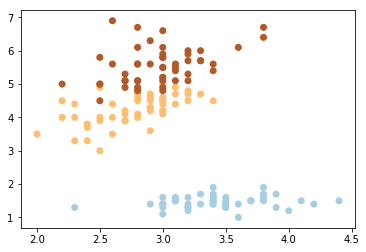

In [11]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap='Paired')

# step1 - 開一台學習機

In [12]:
from sklearn.svm import SVC
clf=SVC(gamma='auto')

# step2 - 訓練

In [13]:
clf.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# step3 - 預測

In [14]:
y_predict=clf.predict(x_test)

In [15]:
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0])

In [16]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 0,
       0, 2, 0, 0, 1, 1, 0])

In [17]:
y_predict-y_test
# 相異程度

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

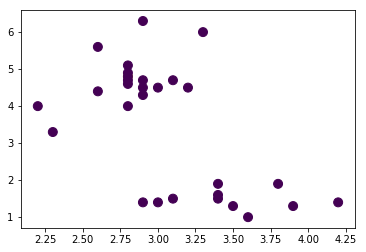

In [18]:
plt.scatter(x_test[:,0],x_test[:,-1],c=y_predict-y_test,s=80)